In [1]:
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
# import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
# from plotnine import *
import io

import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('../data/Agri_all.csv')
df

,YMD,YM,MD,Product,Price,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,4.400000,12.800000,35.200000,0.000000,2.600000,1.600000,0.000000
1,2005-01-04,200501,104,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,-0.200000,8.800000,26.000000,0.000000,2.800000,2.800000,0.000000
2,2005-01-05,200501,105,마늘,20928.571429,1013.00,3.33,49.58,58.27,65.4,60.5,-1.400000,11.200000,33.400000,0.000000,0.600000,3.200000,0.000000
3,2005-01-06,200501,106,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.800000,7.800000,31.200000,1.200000,1.200000,2.600000,0.000000
4,2005-01-07,200501,107,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.000000,7.600000,28.400000,0.000000,2.800000,2.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15875,2020-12-24,202012,1224,고구마,10258.695652,1180.05,0.70,137.90,96.13,108.6,116.4,3.529412,8.588235,59.117647,0.000000,1.705882,3.529412,0.000000
15876,2020-12-28,202012,1228,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,3.941176,11.941176,80.352941,0.058824,0.411765,3.117647,0.000000
15877,2020-12-29,202012,1229,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,1.590909,9.227273,77.227273,1.272727,1.863636,0.636364,0.772727
15878,2020-12-30,202012,1230,고구마,10460.735294,1180.05,0.70,137.90,96.13,108.6,116.4,-5.500000,6.250000,65.375000,0.291667,3.958333,2.666667,0.833333


In [3]:
df = df[df['Product'] == '감자']
df.rename(columns = {'YMD' : 'ds', 'Price' : 'y'}, inplace=True)
df = df.reset_index()
df = df.drop(columns='index')
df

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,감자,6323.101449,1013.00,3.33,71.15,69.162,65.4,60.5,4.500000,6.750000,47.750000,1.000000,3.750000,0.250000,0.000000
1,2005-01-04,200501,104,감자,6233.314286,1013.00,3.33,71.15,69.162,65.4,60.5,-2.250000,8.000000,36.250000,0.000000,3.000000,3.500000,0.000000
2,2005-01-05,200501,105,감자,6332.028169,1013.00,3.33,71.15,69.162,65.4,60.5,-3.500000,11.500000,44.750000,0.000000,0.500000,4.250000,0.000000
3,2005-01-06,200501,106,감자,6417.352113,1013.00,3.33,71.15,69.162,65.4,60.5,1.500000,7.000000,45.250000,1.500000,1.500000,2.250000,0.000000
4,2005-01-07,200501,107,감자,6581.362319,1013.00,3.33,71.15,69.162,65.4,60.5,0.250000,9.250000,38.750000,0.000000,3.000000,4.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,2020-12-24,202012,1224,감자,4937.806452,1180.05,0.70,107.24,102.430,108.6,116.4,3.481481,8.555556,58.259259,0.000000,2.148148,4.259259,0.333333
3966,2020-12-28,202012,1228,감자,5033.016393,1180.05,0.70,107.24,102.430,108.6,116.4,3.750000,11.416667,82.083333,0.000000,0.333333,3.541667,0.041667
3967,2020-12-29,202012,1229,감자,5015.548387,1180.05,0.70,107.24,102.430,108.6,116.4,1.714286,9.035714,83.107143,0.678571,1.571429,0.750000,0.785714
3968,2020-12-30,202012,1230,감자,5016.354839,1180.05,0.70,107.24,102.430,108.6,116.4,-5.766667,8.166667,62.033333,1.800000,3.866667,2.600000,0.833333


In [4]:
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.strftime('%Y-%m')
df = df.reset_index()
df = df.drop(columns='index')
df

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01,200501,103,감자,6323.101449,1013.00,3.33,71.15,69.162,65.4,60.5,4.500000,6.750000,47.750000,1.000000,3.750000,0.250000,0.000000
1,2005-01,200501,104,감자,6233.314286,1013.00,3.33,71.15,69.162,65.4,60.5,-2.250000,8.000000,36.250000,0.000000,3.000000,3.500000,0.000000
2,2005-01,200501,105,감자,6332.028169,1013.00,3.33,71.15,69.162,65.4,60.5,-3.500000,11.500000,44.750000,0.000000,0.500000,4.250000,0.000000
3,2005-01,200501,106,감자,6417.352113,1013.00,3.33,71.15,69.162,65.4,60.5,1.500000,7.000000,45.250000,1.500000,1.500000,2.250000,0.000000
4,2005-01,200501,107,감자,6581.362319,1013.00,3.33,71.15,69.162,65.4,60.5,0.250000,9.250000,38.750000,0.000000,3.000000,4.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,2020-12,202012,1224,감자,4937.806452,1180.05,0.70,107.24,102.430,108.6,116.4,3.481481,8.555556,58.259259,0.000000,2.148148,4.259259,0.333333
3966,2020-12,202012,1228,감자,5033.016393,1180.05,0.70,107.24,102.430,108.6,116.4,3.750000,11.416667,82.083333,0.000000,0.333333,3.541667,0.041667
3967,2020-12,202012,1229,감자,5015.548387,1180.05,0.70,107.24,102.430,108.6,116.4,1.714286,9.035714,83.107143,0.678571,1.571429,0.750000,0.785714
3968,2020-12,202012,1230,감자,5016.354839,1180.05,0.70,107.24,102.430,108.6,116.4,-5.766667,8.166667,62.033333,1.800000,3.866667,2.600000,0.833333


In [5]:
df = df.groupby('ds').mean()
df = df.reset_index()
df = df.rename(columns = {'index' : 'ds'})
df

,ds,YM,MD,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01,200501.0,116.238095,6467.292621,1013.00,3.33,71.15,69.162,65.4,60.5,-1.273810,9.154762,44.059524,0.309524,2.000000,3.166667,0.000000
1,2005-02,200502.0,214.764706,7436.426577,1013.00,3.33,81.05,74.989,65.9,60.3,-0.470588,8.500000,45.235294,2.426471,2.382353,3.220588,0.000000
2,2005-03,200503.0,316.681818,7081.545223,1013.00,3.33,84.32,70.888,67.1,61.5,4.886364,10.284091,43.511364,1.659091,2.306818,4.386364,0.000000
3,2005-04,200504.0,415.761905,6834.099024,1013.00,3.33,93.61,66.735,65.6,59.5,12.857143,11.654762,39.619048,0.845238,2.583333,5.619048,0.000000
4,2005-05,200505.0,515.954545,6803.346901,1013.00,3.33,83.21,66.195,66.3,59.4,16.250000,12.215909,44.102273,2.670455,1.795455,5.715909,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2020-08,202008.0,816.200000,4383.076468,1180.05,0.70,110.43,84.160,95.9,99.2,26.062050,7.205634,85.029623,13.411204,1.401028,2.771700,0.901234
188,2020-09,202009.0,914.619048,4790.924308,1180.05,0.70,116.11,91.910,98.0,104.3,19.998716,8.562358,81.154729,10.211901,1.388489,2.773810,0.177854
189,2020-10,202010.0,1017.947368,4650.754234,1180.05,0.70,112.97,94.780,101.4,112.1,12.254825,12.013772,68.579561,0.350877,0.997807,3.974298,0.023860
190,2020-11,202011.0,1115.238095,4889.213905,1180.05,0.70,119.96,95.220,105.6,114.8,7.894603,10.859365,66.136587,1.561508,1.191429,3.394365,0.114365


In [6]:
df_raw = df.copy()
df['y'] = np.log(df['y'])

In [7]:
Q1=df.y.quantile(0.25)
Q3=df.y.quantile(0.75)
IQR = Q3-Q1
LT=Q1-1.5*IQR
HT= Q3+1.5*IQR
print(LT, HT)
df['outlier']=np.where(((df['y']<LT)|(df['y']>HT)),'yes','no')

7.28914709340964 9.901131370285917


In [8]:
df.loc[(df['outlier']=='yes'), 'y'] = None
df.tail()

,ds,YM,MD,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count,outlier
187,2020-08,202008.0,816.200000,8.385506,1180.05,0.7,110.43,84.16,95.9,99.2,26.062050,7.205634,85.029623,13.411204,1.401028,2.771700,0.901234,no
188,2020-09,202009.0,914.619048,8.474479,1180.05,0.7,116.11,91.91,98.0,104.3,19.998716,8.562358,81.154729,10.211901,1.388489,2.773810,0.177854,no
189,2020-10,202010.0,1017.947368,8.444785,1180.05,0.7,112.97,94.78,101.4,112.1,12.254825,12.013772,68.579561,0.350877,0.997807,3.974298,0.023860,no
190,2020-11,202011.0,1115.238095,8.494787,1180.05,0.7,119.96,95.22,105.6,114.8,7.894603,10.859365,66.136587,1.561508,1.191429,3.394365,0.114365,no
191,2020-12,202012.0,1216.142857,8.499506,1180.05,0.7,107.24,102.43,108.6,116.4,0.035012,9.519534,63.025806,0.158896,1.371380,3.127966,0.355534,no


In [9]:
train = df.iloc[:180]      
test = df.iloc[180:]

In [10]:
train.shape, test.shape

((180, 18), (12, 18))

In [11]:
from sklearn.model_selection import ParameterGrid
params_grid = {
              'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]
               }
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [12]:
# model_parameters = pd.DataFrame(columns = ['MAE','Parameters'])
# for p in grid:
#     LOL = pd.DataFrame()
#     print(p)
# #    random.seed(0)
#     train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
#                          holidays_prior_scale = p['holidays_prior_scale'],
#                          n_changepoints = p['n_changepoints'],
#                          seasonality_mode = p['seasonality_mode'],
                         
#                          daily_seasonality = True,
#                          yearly_seasonality = True, 
#                          interval_width=0.95)
    
#     train_model.fit(train)
#     future = train_model.make_future_dataframe(periods=12, freq='M',include_history = False)
#     train_forecast = train_model.predict(future)
#     LOL=train_forecast[['ds','yhat']]
#     y_true= test['y'].values
#     y_pred = LOL['yhat'][:len(y_true)].values
#     mae = mean_absolute_error(y_true, y_pred)
#     print('Mean Absolute Error: %.3f' % mae)
#     model_parameters = model_parameters.append({'MAE':mae,'Parameters':p},ignore_index=True)

In [13]:
# parameters = model_parameters.sort_values(by=['MAE'])
# parameters = parameters.reset_index(drop=True)
# parameters.head()

In [14]:
# parameters['Parameters'][1]

In [15]:
train = train.drop(columns=['YM', 'MD', 'Food_Price_Index', 'Cereals_Price_Index',
       'DayAvg_Temperature', 'DayDiff_Temperature', 'DayAvg_RelativeHumidity',
       'DaySum_Rainfall', 'DayAvg_WindSpeed', 'DaySum_Sunshine',
       'Warning_Count'
       ])
# train['Warning_Count'] = np.exp(train['Warning_Count'])
train.columns

Index(['ds', 'y', 'KRW_USD_EXR', 'Annual_Call_Rate', 'item_PPI', 'item_CPI',
       'outlier'],
      dtype='object')

In [16]:
final_model = Prophet(
                      changepoint_prior_scale= 0.1,
                      holidays_prior_scale = 0.2,
                      n_changepoints = 150,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95
                     )
final_model.fit(train)

21:32:49 - cmdstanpy - INFO - Chain [1] start processing
21:32:49 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = final_model.make_future_dataframe(periods=12, freq='M')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
185,2020-05-31,8.145807,7.773229,8.547046
186,2020-06-30,8.054849,7.637240,8.460252
187,2020-07-31,8.142711,7.761335,8.547491
188,2020-08-31,8.128285,7.717140,8.557388
189,2020-09-30,8.070029,7.634982,8.450790
190,2020-10-31,8.130487,7.687418,8.557631
191,2020-11-30,8.293510,7.855369,8.726670


In [18]:
df['y']=np.exp(df['y'])
forecast['yhat']=np.exp(forecast['yhat'])

In [19]:
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.strftime('%Y-%m')
df['ds'] = df['ds'].astype('str') + '-1'
df['ds'] = pd.to_datetime(df['ds'])
# df.info()

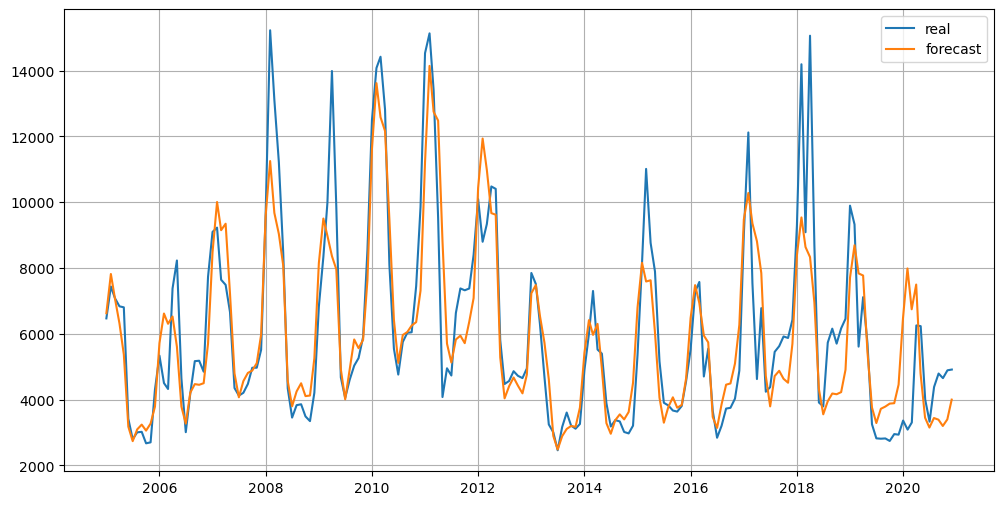

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [21]:
# con = pd.concat([df, forecast], axis=1)
# con = con.dropna(axis=0)
# df1 = con[df.columns]
# forecast1 = con[forecast.columns]

In [22]:
# y_true= df1['y'].values
# y_pred = forecast1['yhat'].values
# mae = mean_absolute_error(y_true, y_pred)
# print('Mean Absolute Error: %.3f' % mae)

In [23]:
evaluation_model = cross_validation(final_model, initial='1095 days', period='180 days', horizon='365 days')
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.sort_values('mae').head(5)

  0%|          | 0/23 [00:00<?, ?it/s]

21:32:50 - cmdstanpy - INFO - Chain [1] start processing
21:33:21 - cmdstanpy - INFO - Chain [1] done processing
21:33:21 - cmdstanpy - INFO - Chain [1] start processing
21:33:57 - cmdstanpy - INFO - Chain [1] done processing
21:33:57 - cmdstanpy - INFO - Chain [1] start processing
21:34:39 - cmdstanpy - INFO - Chain [1] done processing
21:34:39 - cmdstanpy - INFO - Chain [1] start processing
21:35:28 - cmdstanpy - INFO - Chain [1] done processing
21:35:29 - cmdstanpy - INFO - Chain [1] start processing
21:36:23 - cmdstanpy - INFO - Chain [1] done processing
21:36:23 - cmdstanpy - INFO - Chain [1] start processing
21:37:27 - cmdstanpy - INFO - Chain [1] done processing
21:37:27 - cmdstanpy - INFO - Chain [1] start processing
21:38:39 - cmdstanpy - INFO - Chain [1] done processing
21:38:39 - cmdstanpy - INFO - Chain [1] start processing
21:40:00 - cmdstanpy - INFO - Chain [1] done processing
21:40:00 - cmdstanpy - INFO - Chain [1] start processing
21:41:31 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
89,185 days,0.154932,0.393613,0.285911,0.033728,0.025293,0.034128,0.925926
82,174 days,0.235681,0.485470,0.305509,0.035736,0.019760,0.035660,0.925926
91,190 days,0.166317,0.407820,0.307079,0.036367,0.025518,0.036940,0.962963
97,201 days,0.159961,0.399951,0.307783,0.036229,0.026113,0.036605,0.962963
84,176 days,0.236016,0.485815,0.309045,0.036127,0.019760,0.036075,0.925926


In [30]:
evaluation_metrics = evaluation_metrix.sort_values('mae')

In [31]:
evaluation_metrics.to_csv('Monthly_Potato_Metrics.csv')

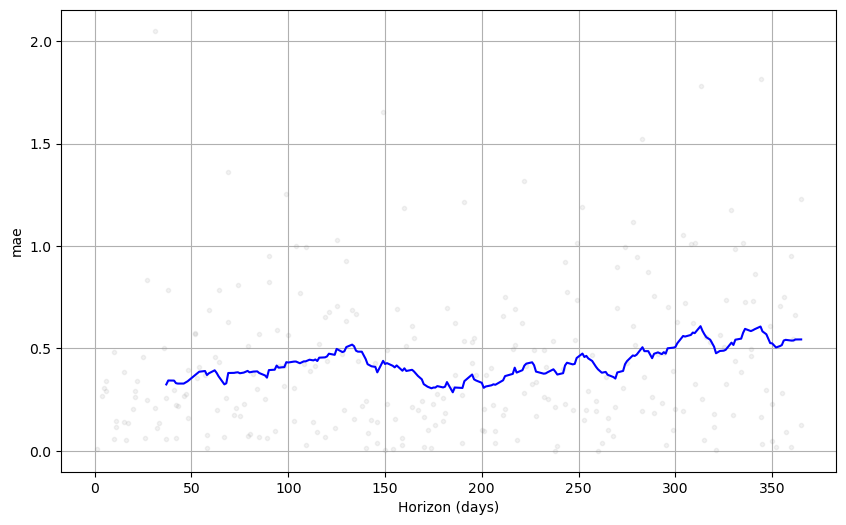

In [28]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(evaluation_model, 'mae')